In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize']= 20,10


In [2]:
v = pd.read_csv(r"C:\Users\USER\Downloads\AGN_LC3.txt",sep=" ", index_col="MJD", parse_dates=[0])
v = v.loc[:, ~v.columns.str.contains('^Unnamed')]

v.head()

,Flux,Error
MJD,,
54687.650035,2.936060e-07,4.214372e-08
54697.650035,2.990764e-07,4.331751e-08
54707.650035,3.131870e-07,5.657812e-08
54717.650035,2.844194e-07,4.606498e-08
54727.650035,2.098870e-07,3.806747e-08


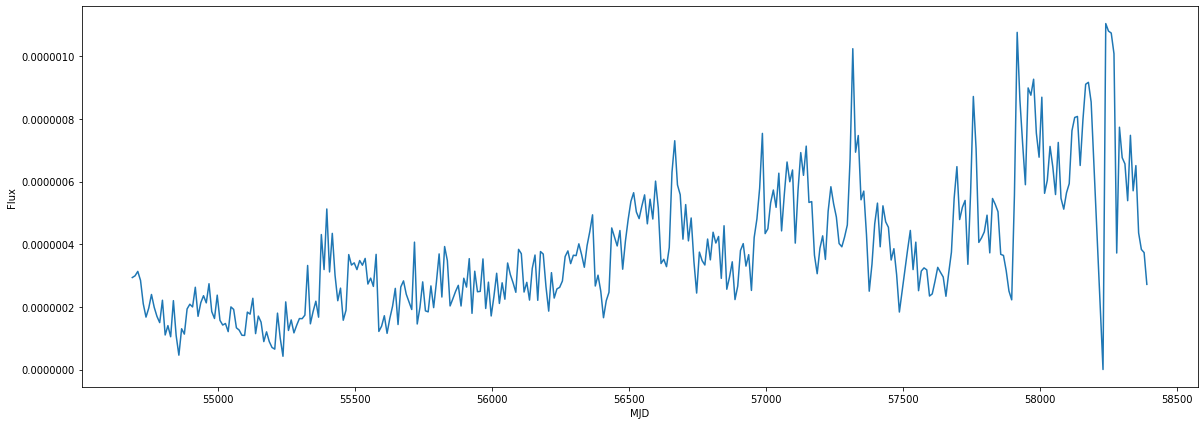

In [8]:
# plot without error
y=v['Flux']
error=v['Error']
plt.figure(figsize=(20,7))
plt.xlabel('MJD')
plt.ylabel('Flux')
plt.plot(y)

plt.show()

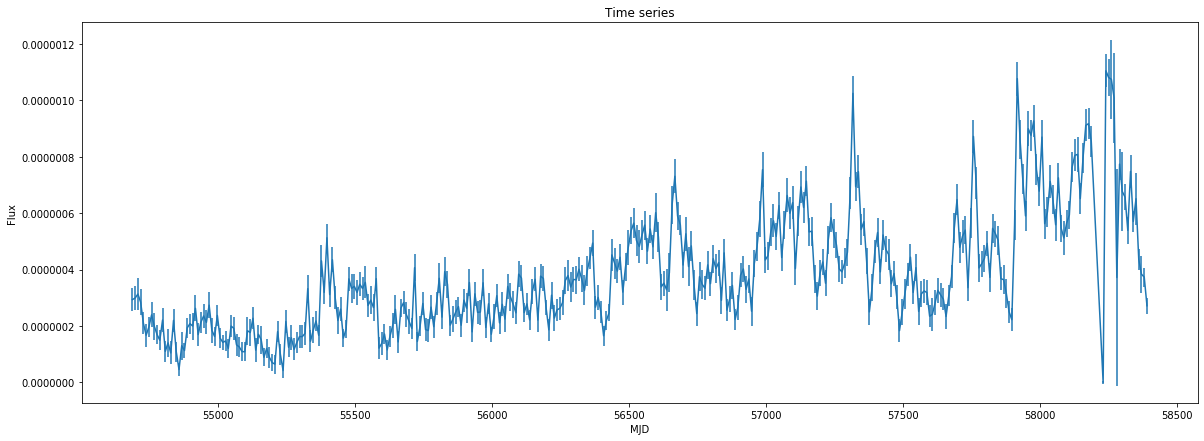

In [21]:
#plot with error
plt.figure(figsize=(20,7))
plt.xlabel('MJD')
plt.ylabel('Flux')
plt.errorbar(v.index,y,yerr=error)
plt.title('Time series')
plt.show()

In [24]:
#Stationarity check
# 1. Rolling mean
v['Mean']=v['Flux'].rolling(window=12).mean()
v['Mean']


MJD
54687.650035             NaN
54697.650035             NaN
54707.650035             NaN
54717.650035             NaN
54727.650035             NaN
54737.650035             NaN
54747.650035             NaN
54757.650035             NaN
54767.650035             NaN
54777.650035             NaN
54787.650035             NaN
54797.650035    2.285005e-07
54807.650035    2.132185e-07
54817.650035    1.999720e-07
54827.650035    1.825893e-07
54837.650035    1.772044e-07
54847.650035    1.687870e-07
54857.650035    1.586603e-07
54867.650035    1.531664e-07
54877.650035    1.426263e-07
54887.650035    1.421911e-07
54897.650035    1.454256e-07
54907.650035    1.495992e-07
54917.650035    1.530521e-07
54927.650035    1.580166e-07
54937.650035    1.641226e-07
54947.650035    1.750408e-07
54957.650035    1.744529e-07
54967.650035    1.882005e-07
54977.650035    1.997959e-07
                    ...     
58067.650035    7.343458e-07
58077.650035    7.049977e-07
58087.650035    6.746827e-07
58097.6500

Text(0.5, 1.0, 'Rolling Mean')

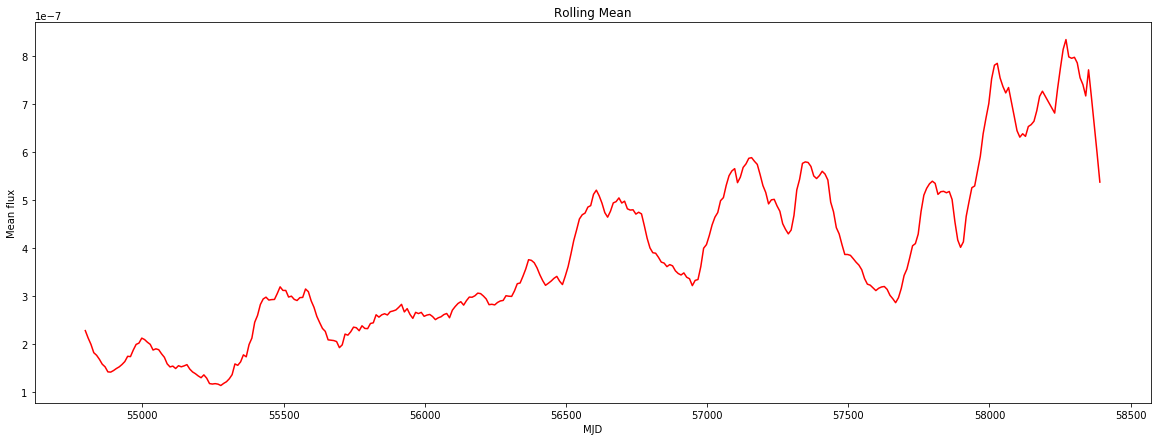

In [26]:
mean= v['Mean']
plt.figure(figsize=(20,7))
plt.xlabel('MJD')
plt.ylabel('Mean flux')
plt.plot(mean,color='Red',label='Rolling mean')
plt.title('Rolling Mean')


In [27]:
# 2. Standard Deviation
v['Std']=v['Flux'].rolling(window=12).std()
v['Std']

MJD
54687.650035             NaN
54697.650035             NaN
54707.650035             NaN
54717.650035             NaN
54727.650035             NaN
54737.650035             NaN
54747.650035             NaN
54757.650035             NaN
54767.650035             NaN
54777.650035             NaN
54787.650035             NaN
54797.650035    5.673978e-08
54807.650035    6.205706e-08
54817.650035    5.895165e-08
54827.650035    5.298508e-08
54837.650035    4.426052e-08
54847.650035    4.699996e-08
54857.650035    5.893262e-08
54867.650035    5.819812e-08
54877.650035    5.229945e-08
54887.650035    5.181110e-08
54897.650035    5.480184e-08
54907.650035    5.702154e-08
54917.650035    6.271785e-08
54927.650035    6.136263e-08
54937.650035    6.304221e-08
54947.650035    6.314078e-08
54957.650035    6.271760e-08
54967.650035    6.507362e-08
54977.650035    4.737311e-08
                    ...     
58067.650035    1.319242e-07
58077.650035    1.311701e-07
58087.650035    1.301780e-07
58097.6500

Text(0.5, 1.0, 'Standard deviation')

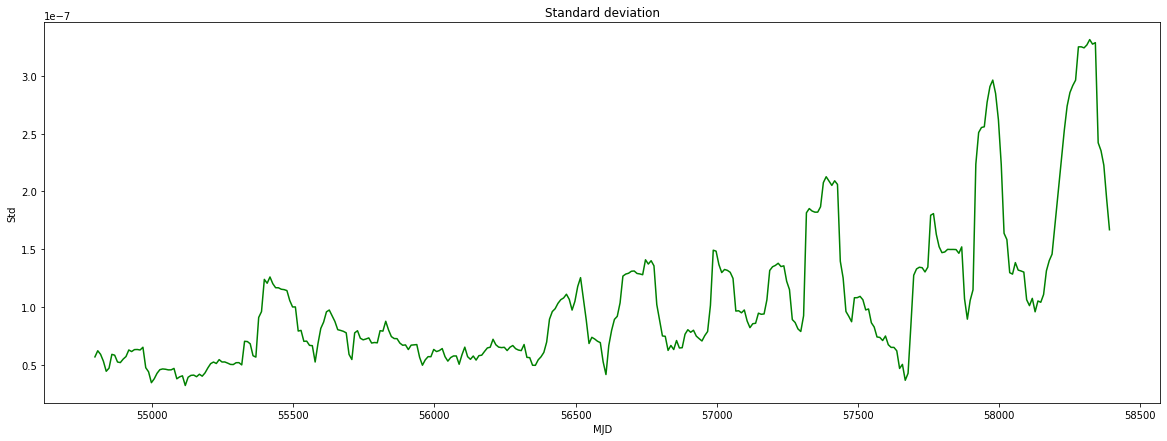

In [29]:
std=v['Std']
plt.figure(figsize=(20,7))
plt.xlabel('MJD')
plt.ylabel('Std')
plt.plot(std,color='green')
plt.title('Standard deviation')

In [31]:
# ...............Difference Method.............
v['diff'] = v['Flux'].diff()
v['diff']

MJD
54687.650035             NaN
54697.650035    5.470396e-09
54707.650035    1.411063e-08
54717.650035   -2.876769e-08
54727.650035   -7.453233e-08
54737.650035   -4.261321e-08
54747.650035    2.878005e-08
54757.650035    4.342580e-08
54767.650035   -4.091633e-08
54777.650035   -2.897891e-08
54787.650035   -1.985639e-08
54797.650035    7.141863e-08
54807.650035   -1.109239e-07
54817.650035    2.989585e-08
54827.650035   -3.552411e-08
54837.650035    1.152058e-07
54847.650035   -1.109215e-07
54857.650035   -6.312643e-08
54867.650035    8.437515e-08
54877.650035   -1.712843e-08
54887.650035    8.034179e-08
54897.650035    1.505677e-08
54907.650035   -8.585459e-09
54917.650035    6.276898e-08
54927.650035   -9.278379e-08
54937.650035    4.359220e-08
54947.650035    2.222357e-08
54957.650035   -2.286702e-08
54967.650035    6.110403e-08
54977.650035   -8.895376e-08
                    ...     
58067.650035    1.663401e-07
58077.650035   -1.781884e-07
58087.650035   -3.481069e-08
58097.6500

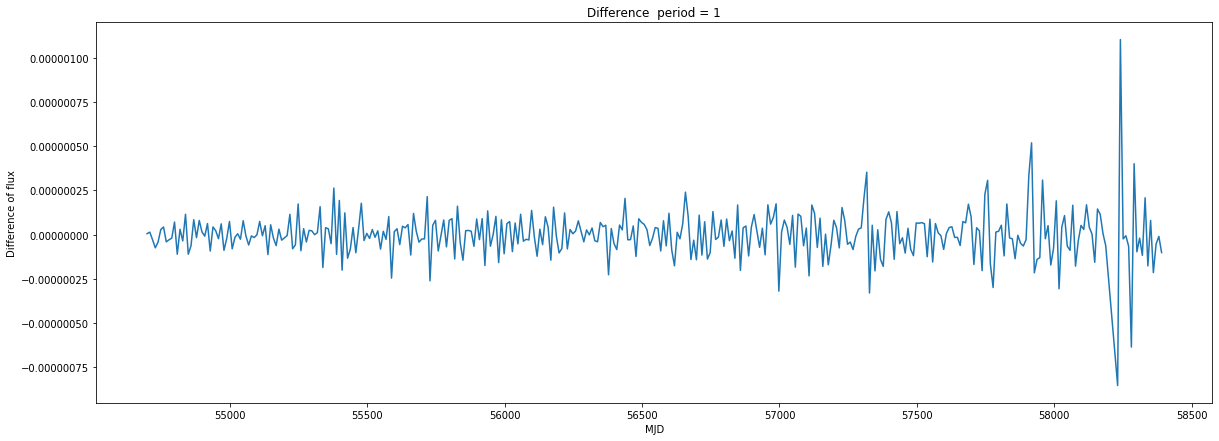

In [32]:
d = v['diff']
plt.figure(figsize=(20,7))
plt.xlabel('MJD')
plt.ylabel('Difference of flux')
plt.title('Difference  period = 1')
plt.plot(d)

In [33]:
v = v.loc[~v.index.duplicated(keep='first')]
v['D']= v['diff']


MJD
54687.650035             NaN
54697.650035    5.470396e-09
54707.650035    1.411063e-08
54717.650035   -2.876769e-08
54727.650035   -7.453233e-08
54737.650035   -4.261321e-08
54747.650035    2.878005e-08
54757.650035    4.342580e-08
54767.650035   -4.091633e-08
54777.650035   -2.897891e-08
54787.650035   -1.985639e-08
54797.650035    7.141863e-08
54807.650035   -1.109239e-07
54817.650035    2.989585e-08
54827.650035   -3.552411e-08
54837.650035    1.152058e-07
54847.650035   -1.109215e-07
54857.650035   -6.312643e-08
54867.650035    8.437515e-08
54877.650035   -1.712843e-08
54887.650035    8.034179e-08
54897.650035    1.505677e-08
54907.650035   -8.585459e-09
54917.650035    6.276898e-08
54927.650035   -9.278379e-08
54937.650035    4.359220e-08
54947.650035    2.222357e-08
54957.650035   -2.286702e-08
54967.650035    6.110403e-08
54977.650035   -8.895376e-08
                    ...     
58067.650035    1.663401e-07
58077.650035   -1.781884e-07
58087.650035   -3.481069e-08
58097.6500

In [34]:
v['diff'].dropna(inplace=True)


MJD
54697.650035    5.470396e-09
54707.650035    1.411063e-08
54717.650035   -2.876769e-08
54727.650035   -7.453233e-08
54737.650035   -4.261321e-08
54747.650035    2.878005e-08
54757.650035    4.342580e-08
54767.650035   -4.091633e-08
54777.650035   -2.897891e-08
54787.650035   -1.985639e-08
54797.650035    7.141863e-08
54807.650035   -1.109239e-07
54817.650035    2.989585e-08
54827.650035   -3.552411e-08
54837.650035    1.152058e-07
54847.650035   -1.109215e-07
54857.650035   -6.312643e-08
54867.650035    8.437515e-08
54877.650035   -1.712843e-08
54887.650035    8.034179e-08
54897.650035    1.505677e-08
54907.650035   -8.585459e-09
54917.650035    6.276898e-08
54927.650035   -9.278379e-08
54937.650035    4.359220e-08
54947.650035    2.222357e-08
54957.650035   -2.286702e-08
54967.650035    6.110403e-08
54977.650035   -8.895376e-08
54987.650035   -2.200893e-08
                    ...     
58067.650035    1.663401e-07
58077.650035   -1.781884e-07
58087.650035   -3.481069e-08
58097.6500

In [35]:
# Dickey Fuller test
from statsmodels.tsa.stattools import adfuller

print('Result of Dickey fuller test')
dftest = adfuller(v['diff'], autolag='AIC')

dfout = pd.Series(dftest[0:4], index =['test statistics','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfout['Critical value(%s)'%key] = value

print(dfout)

Result of Dickey fuller test
test statistics               -7.095290e+00
p-value                        4.305082e-10
#Lags Used                     1.400000e+01
Number of Observations Used    3.520000e+02
Critical value(1%)            -3.449065e+00
Critical value(5%)            -2.869786e+00
Critical value(10%)           -2.571163e+00
dtype: float64


In [36]:
# Test statistics < critical value
# p - value is very small
# So v['diff'] is stationary series

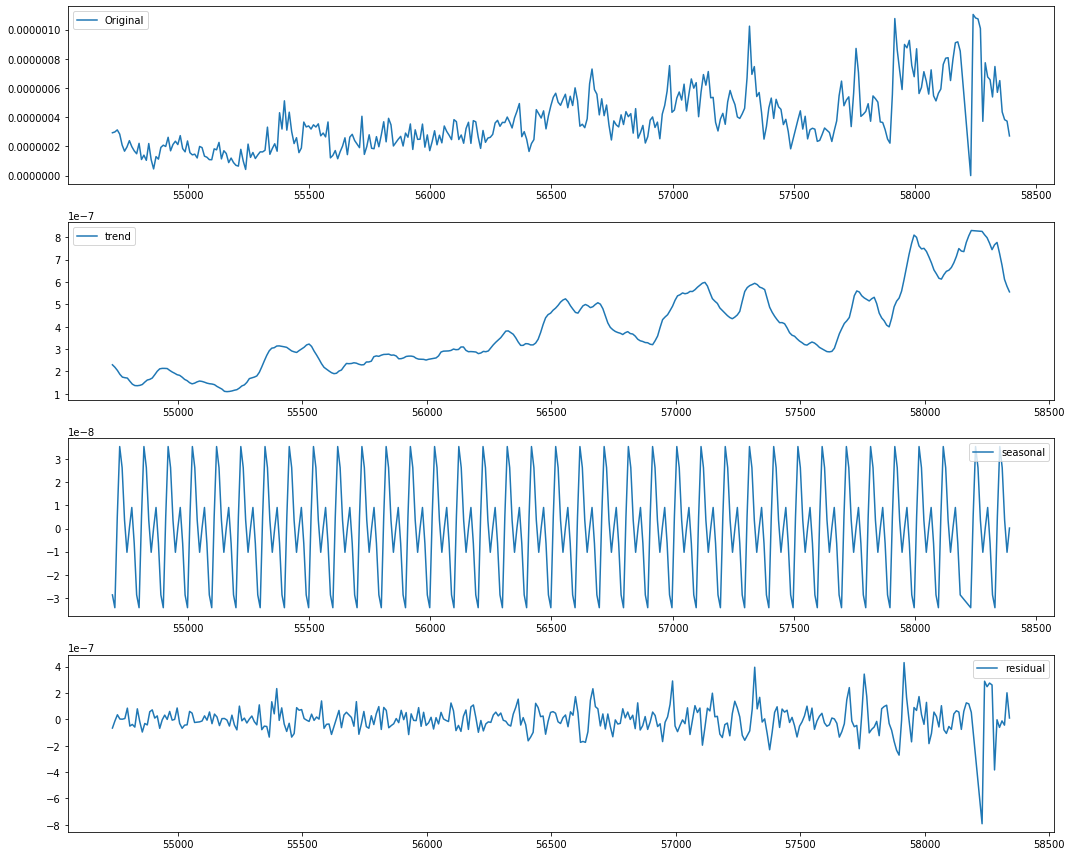

In [37]:
#.................Components................

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(v['Flux'],freq = 10)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(15,12))
plt.subplot(411)

plt.plot(y,label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal, label='seasonal')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')
plt.tight_layout()


